# Define Spatial Extent of Project

This notebook retrieves Metropolitan Council's 2010 boundaries of the Twin Cities area and extracts the Minneapolis's boundary. The boundary is saved as a zip of the shapefile and a json.

Output Coordinate Reference System: UTM 15N - EPSG:26915 **or** WGS84 - EPSG:4326

*WGS84 was added 3/25/2022 for compatibility with Folium (Leaflet) interactive webmapping*

Source: https://gisdata.mn.gov/dataset/us-mn-state-metc-bdry-census2010counties-ctus

Metadata: https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metc/bdry_census2010counties_ctus/metadata/metadata.html


In [1]:
### Import Packages

# File manipulation

import os # For working with Operating System
from sys import platform # Diagnose operating system
import shutil # For deleting folders
import urllib # For accessing websites
import zipfile # For extracting from Zipfiles
from io import BytesIO # For reading bytes objects

# Analysis

import geopandas as gpd # Spatial Data Manipulation

cwd = os.getcwd() # Current Working Directory


In [2]:
### Definitions

files_before = os.listdir() # Take note of filenames in current working directory so they won't be deleted in the end

# Forward or back slashs for filepaths? <- Not sure here. Only know Windows & Linux

if platform == "linux" or platform == "linux2":
    slash = '/'
elif platform == 'win32':
    slash = '\\'

def extract_zip_from_url(urls):
    '''Extract a zipfile from the internet and unpack it in working directory.
    Takes a single url (string) or a list of urls.'''
    
    if type(urls) == str: # Single url
        url = urls
        response = urllib.request.urlopen(url) # Get a response
        zip_folder = zipfile.ZipFile(BytesIO(response.read())) # Read Response
        zip_folder.extractall() # Extract files
    
    elif type(urls) == list: # List of urls
        for url in urls:
            response = urllib.request.urlopen(url) # Get a response
            zip_folder = zipfile.ZipFile(BytesIO(response.read())) # Read Response
            zip_folder.extractall() # Extract files
            
    else:
        print('Error: Invalid Input')

In [3]:
# Download Data

## Twin Cities Metro Boundaries - Downloaded from MN GeospatialCommons gisdata.mn.gov  (~ 5mb)

url = "https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metc/bdry_census2010counties_ctus/shp_bdry_census2010counties_ctus.zip"

extract_zip_from_url(url)

<AxesSubplot:>

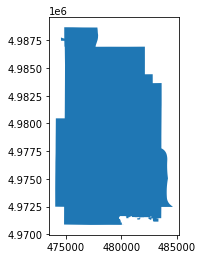

In [7]:
# Read, Select, and Show Data

metro = gpd.read_file(r"Census2010CTUs.shp") # Read data to geodataframe

mpls = metro[metro['CTU_NAME']=='Minneapolis'] # Select Minneapolis' shape

mpls.plot()

In [5]:
# Save File as Zip

# UTM 15N

mpls.to_file(r'mpls_boundary.shp') # Save shapefile

cwd = os.getcwd() # Current Working Directory

mpls_boundary = zipfile.ZipFile(cwd + slash + 'mpls_boundary.zip', 'w', zipfile.ZIP_DEFLATED) # Initialize folder

for root, dirs, files in os.walk(cwd):
    for file in files:
        if 'mpls_boundary' in file and file != 'mpls_boundary.zip': # Locate Shapefiles
            mpls_boundary.write(file) # Write to Zip
            
mpls_boundary.close() # Close zip

mpls.to_file(r'mpls_boundary.geojson', driver='GeoJSON') # Save geojson

In [8]:
# WGS 84 - For Folium (Leaflet) Compatability

mpls_boundaryWGS84 = zipfile.ZipFile(cwd + slash + 'mpls_boundaryWGS84.zip', 'w', zipfile.ZIP_DEFLATED) # Initialize folder

for root, dirs, files in os.walk(cwd):
    for file in files:
        if 'mpls_boundaryWGS84' in file and file != 'mpls_boundaryWGS84.zip': # Locate Shapefiles
            mpls_boundaryWGS84.write(file) # Write to Zip
            
mpls_boundaryWGS84.close() # Close zip

mpls.to_crs('EPSG:4326').to_file(r'mpls_boundaryWGS84.geojson', driver='GeoJSON') # Save geojson